In [2]:
import sunbraid as sun
from sunbraid.data import get_sp500
%load_ext autoreload
%autoreload 2

In [4]:
stocks_df = get_sp500(days=30, sectors='Energy')
stocks_df.head()

/Users/estevao.uyra/dev/sunbraid/sunbraid/data/stocks.py:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Date       Open       High        Low      Close  Adj Close    Volume  \
0 2023-12-28  36.990002  37.090000  36.080002  36.099998  35.805832   3483400   
1 2023-12-29  36.310001  36.349998  35.770000  35.880001  35.587627   3671100   
2 2024-01-02  36.139999  36.639999  35.910000  36.110001  35.815754   2838700   
3 2024-01-03  35.990002  36.910000  35.599998  36.750000  36.450539   3007300   
4 2024-01-04  34.750000  35.130001  33.970001  34.049999  33.772537  19168900   

        industry  sector         longName   totalDebt  \
0  Oil & Gas E&P  Energy  APA Corporation  5692000256   
1  Oil & Gas E&P  Energy  APA Corporation  5692000256   
2  Oil & Gas E&P  Energy  APA Corporation  5692000256   
3  Oil & Gas E&P  Energy  APA Corporation  5692000256   
4  Oil & Gas E&P  Energy  APA Corporation  5692000256   

                                 longBusinessSummary  targetMedianPrice  \
0  APA Corporation, through its subsidiaries, exp...               40.0   
1  APA Corporation, through its subsidiaries, exp...               40.0   
2  APA Corporation, through its subsidiaries, exp...               40.0   
3  APA Corporation, through its subsidiaries, exp...               40.0   
4  APA Corporation, through its subsidiaries, exp...               40.0   

   recommendationMean recommendationKey  numberOfAnalystOpinions  \
0                 2.4               buy                       24   
1                 2.4               buy                       24   
2                 2.4               buy                       24   
3                 2.4               buy                       24   
4                 2.4               buy                       24   

   sharesOutstanding    Market Cap Symbol  
0          303055008  1.094029e+10    APA  
1          303055008  1.087361e+10    APA  
2          303055008  1.094332e+10    APA  
3          303055008  1.113727e+10    APA  
4          303055008  1.031902e+10    APA

In [ ]:
from IPython.display import

displaying



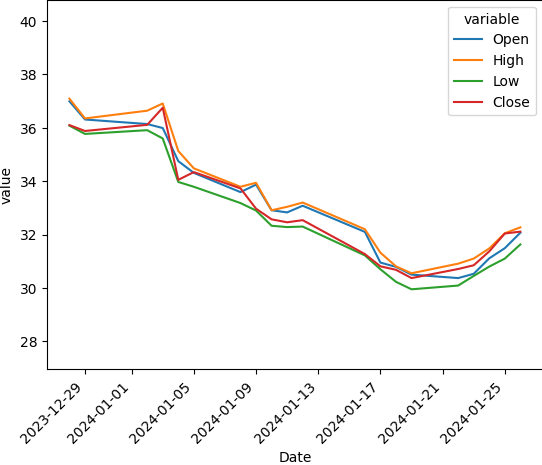
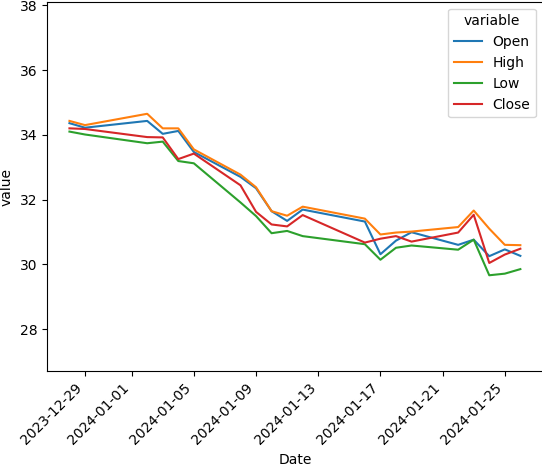
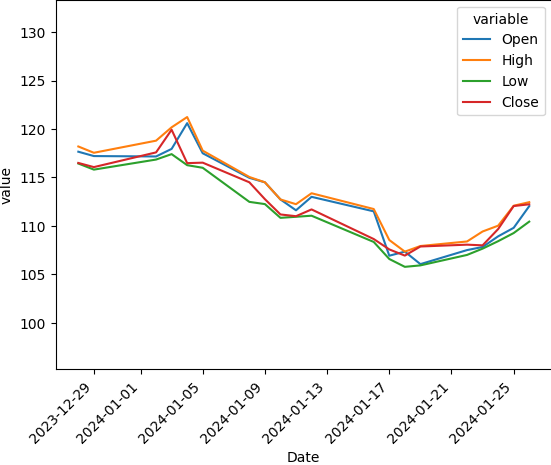
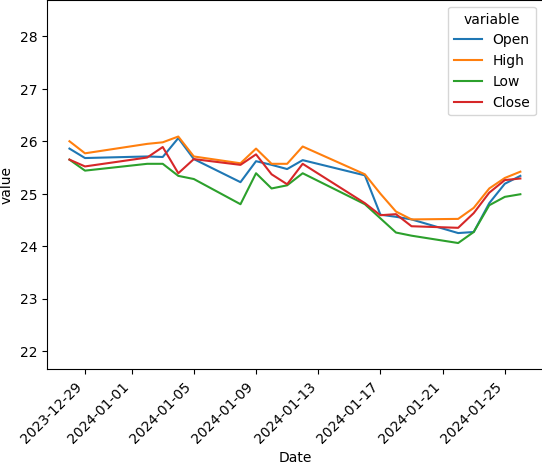
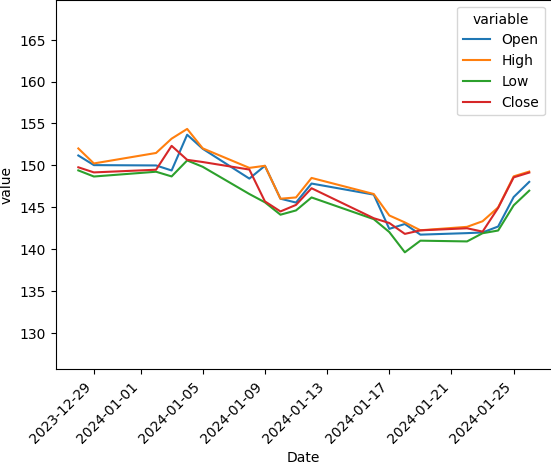
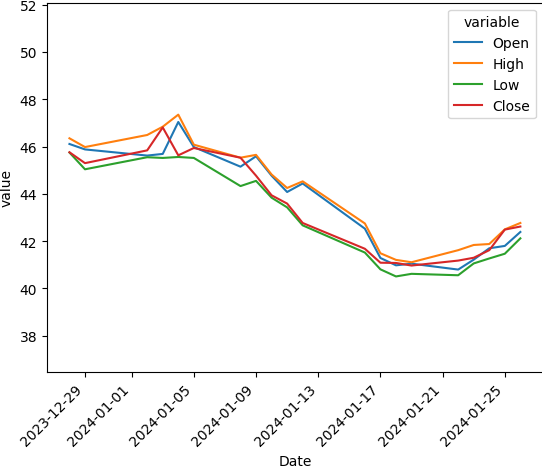
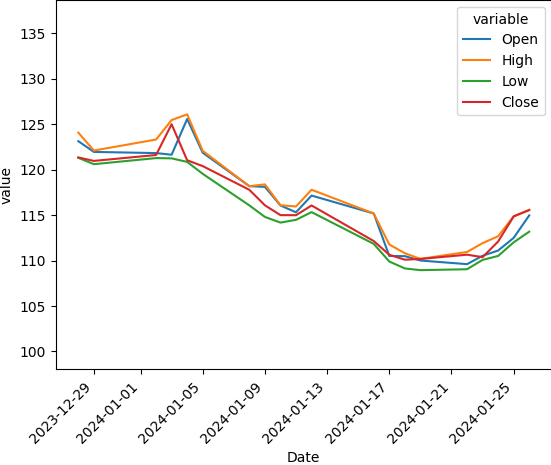
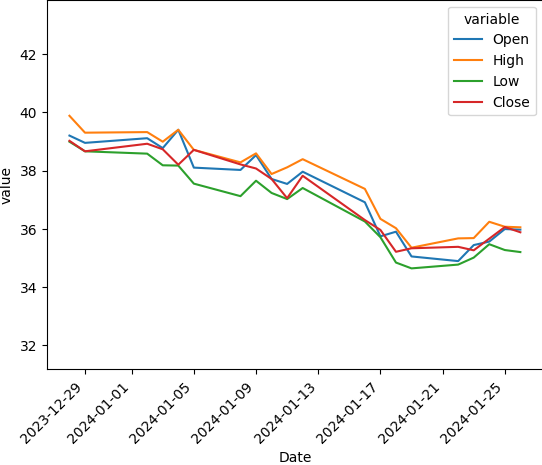
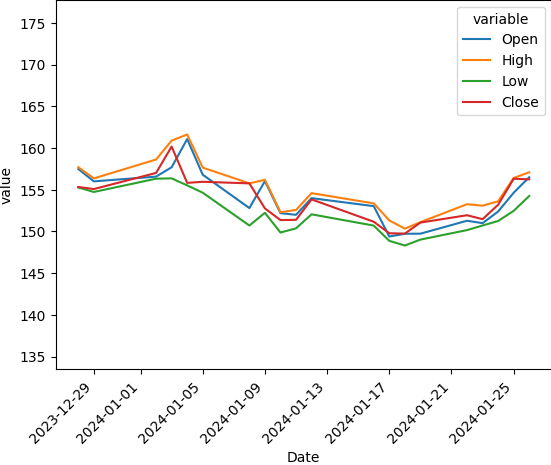
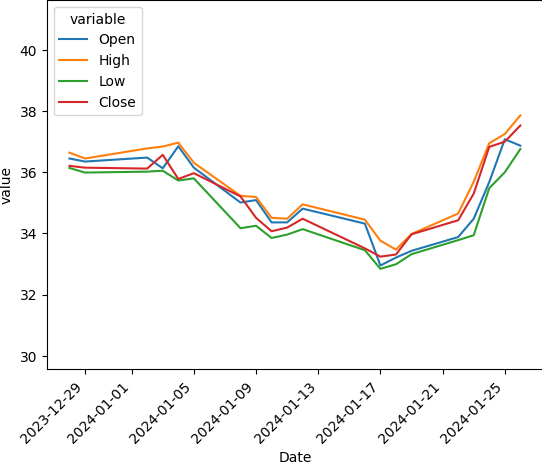
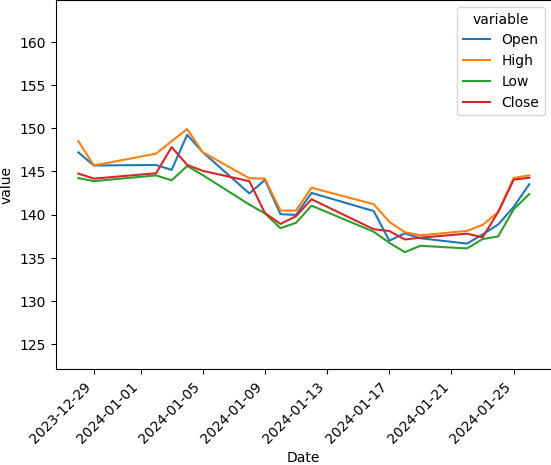
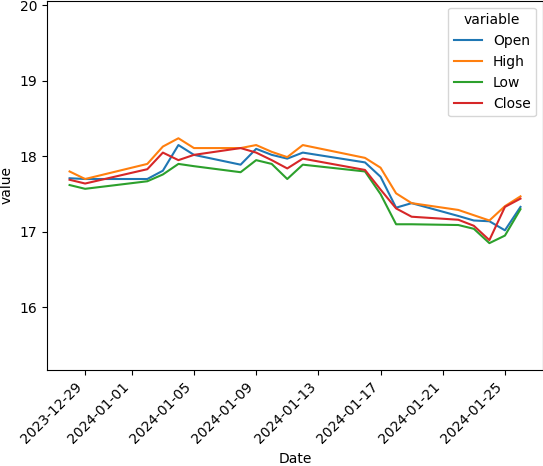
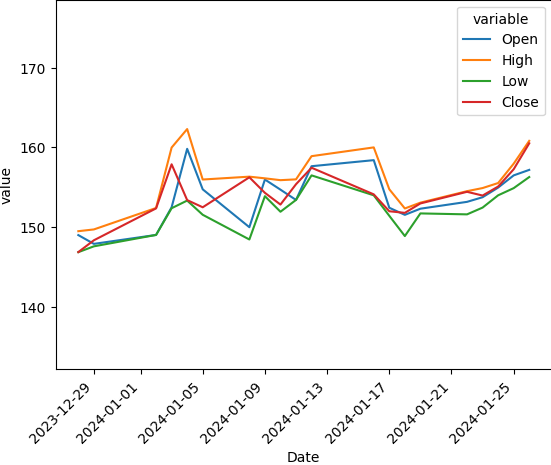
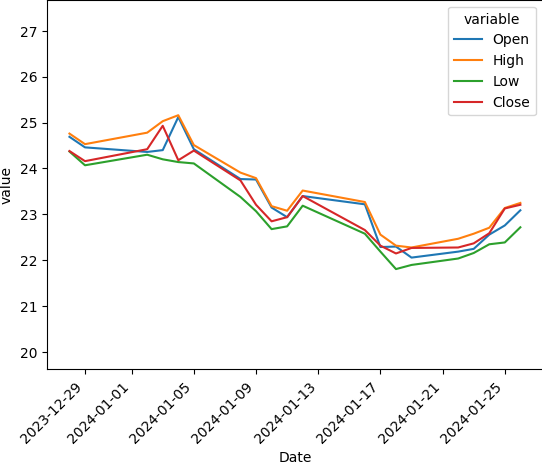
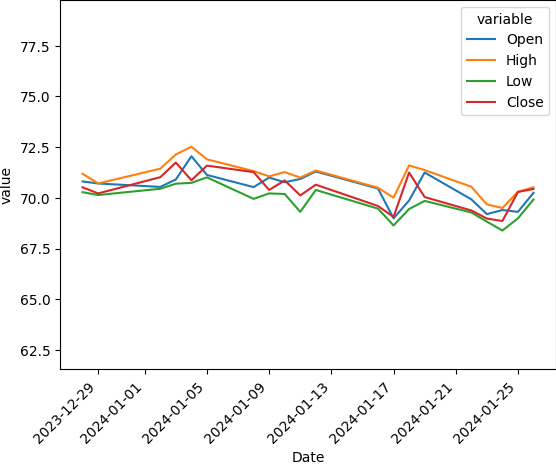
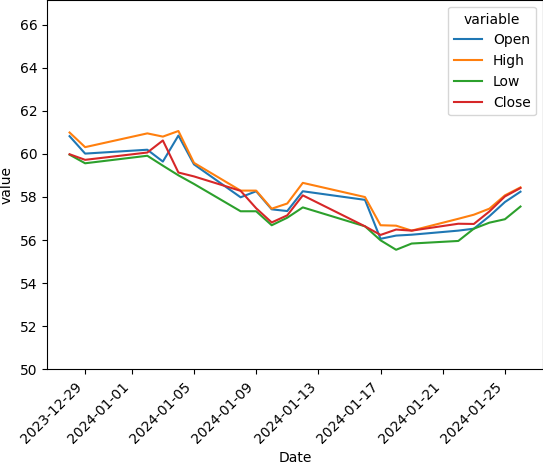
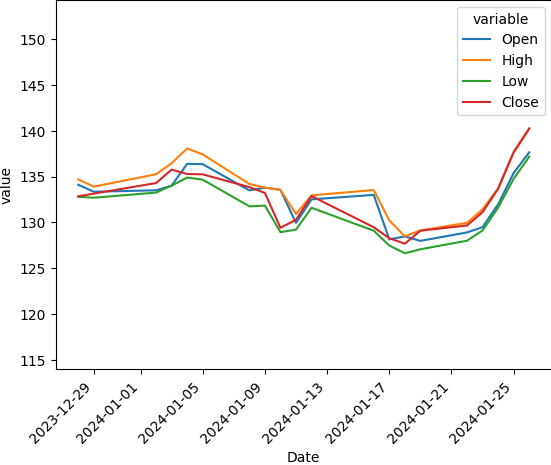
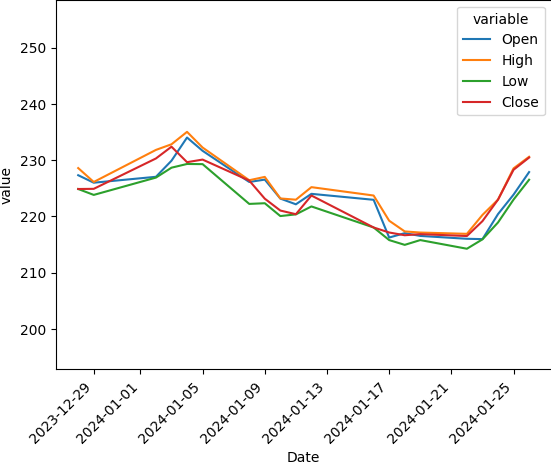
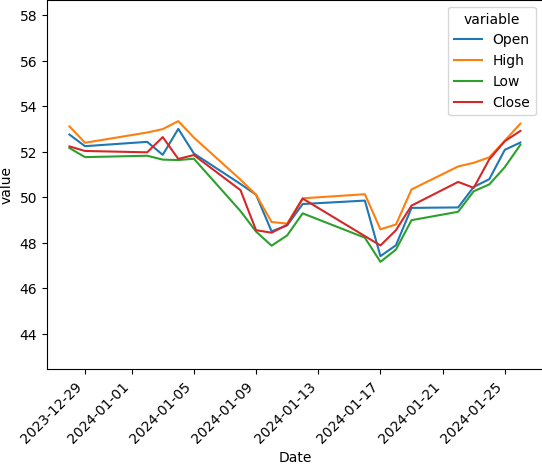
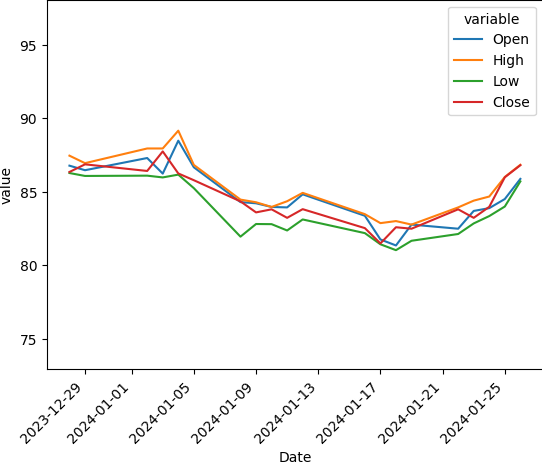
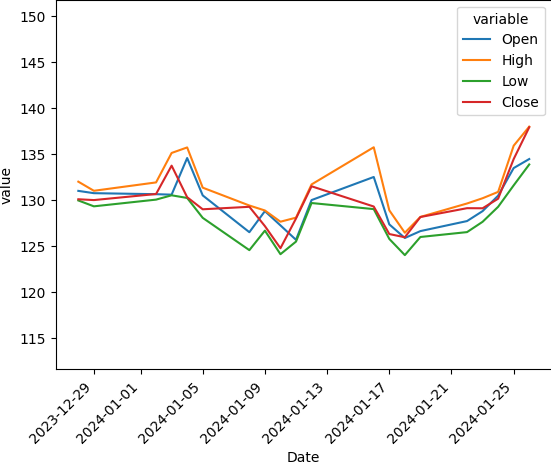
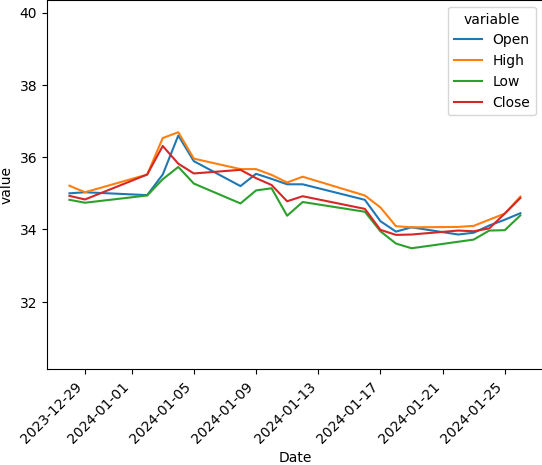
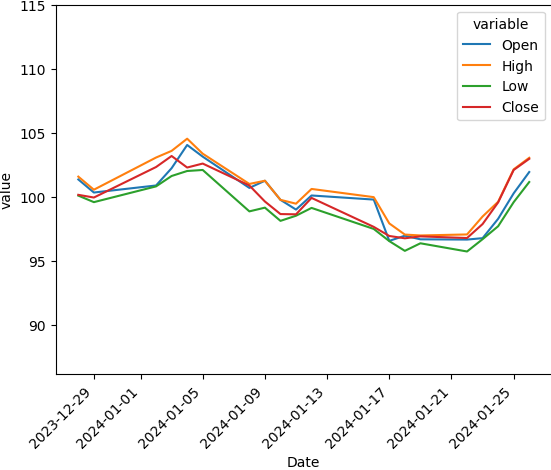

In [119]:
sun.render(sun.inline.lineplot(stocks_df, 
                 level=['Symbol'], 
                 x='Date', y=['Open', 'High', 'Low', 'Close'], 
                 # post_fig=post_fig,
                 classes = 'magnifiable',
                name='stock price'
                ),
          )

## Multiple charts with figure postprocessing

In [117]:
def post_fig(data, fig, ax):
    ax.xaxis.set_ticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    if 'value' in data.columns:
        ax.set_ylim(data['value'].min()*0.9, data['value'].max()*1.1)

prices = sun.inline.lineplot(stocks_df, 
                 level=['Symbol'], 
                 x='Date', y=['Open', 'High', 'Low', 'Close'], 
                 post_fig=post_fig,
                 classes = 'magnifiable',
                name='stock price'
                )

volume = sun.inline.lineplot(stocks_df, 
                 level=['Symbol'], 
                 x='Date', y='Volume', 
                 post_fig=post_fig,
                 classes = 'magnifiable',
                name='volume'
                )

mcap = sun.inline.lineplot(stocks_df, 
                 level=['Symbol'], 
                 x='Date', y='Market Cap', 
                 post_fig=post_fig,
                 classes = 'magnifiable',
                name='market cap'
                )

displaying



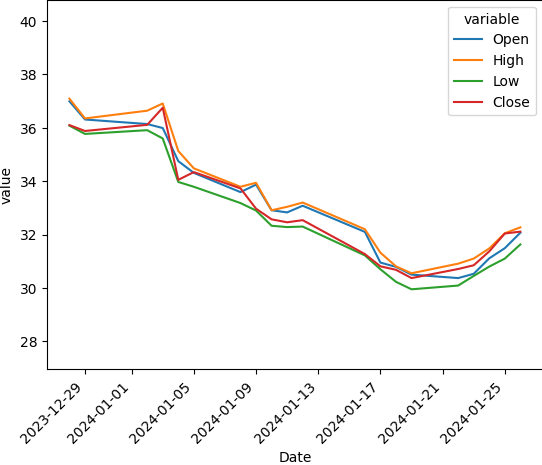
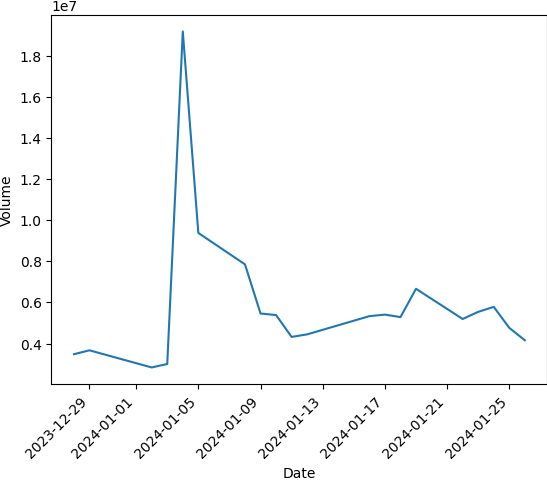
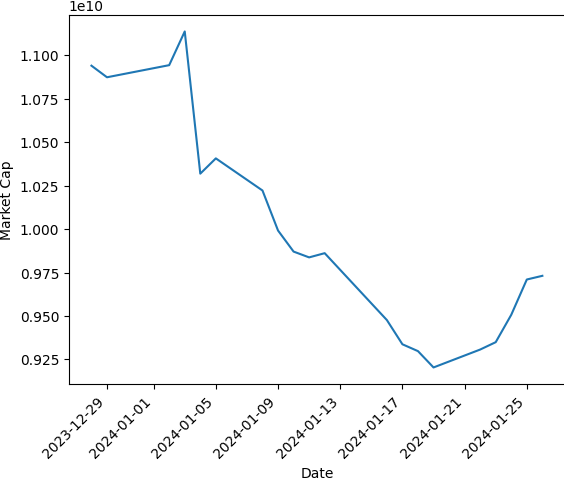
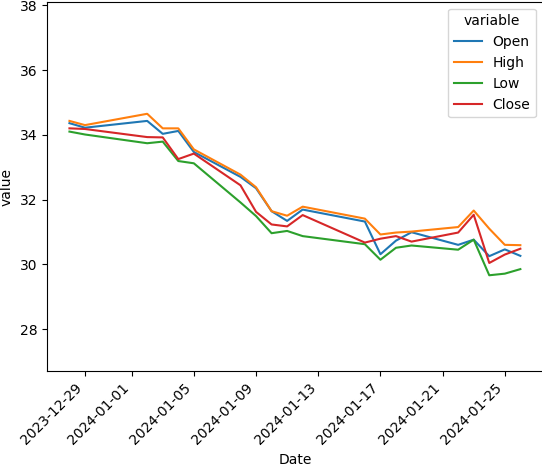
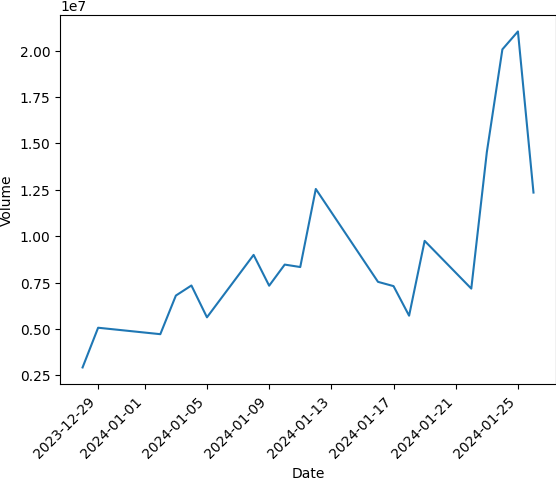
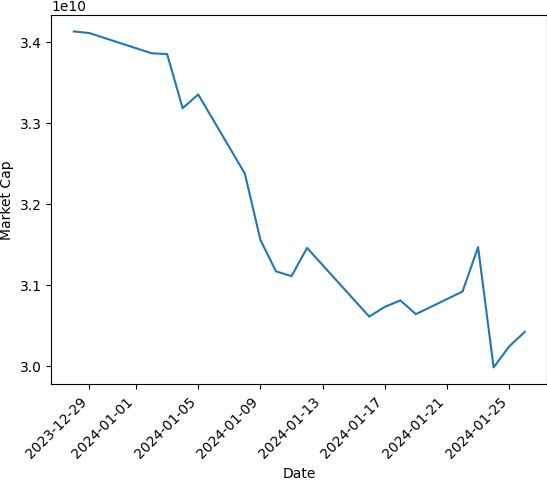
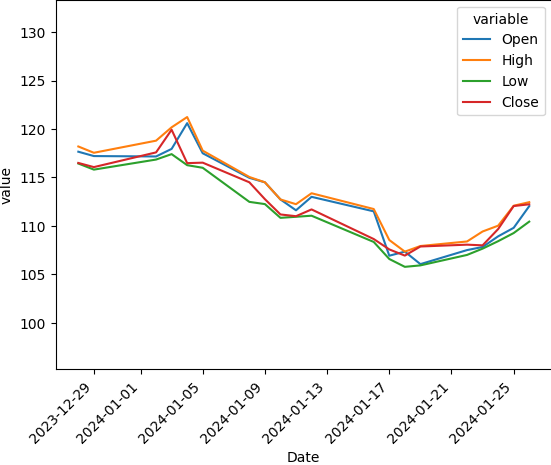
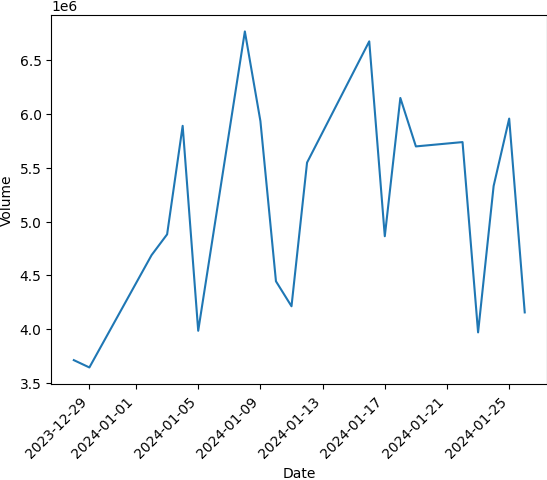
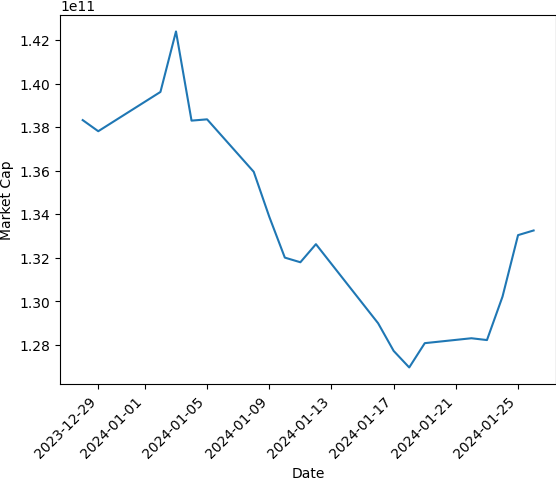
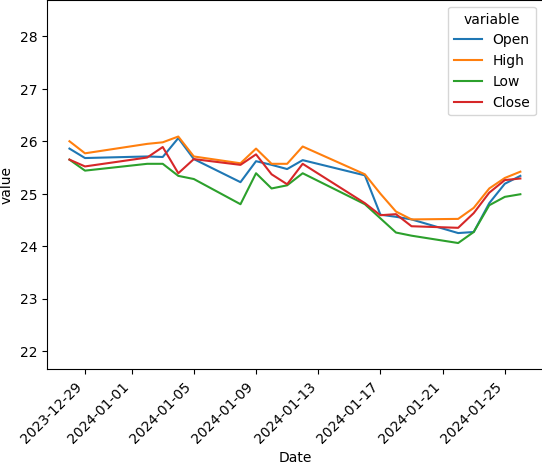
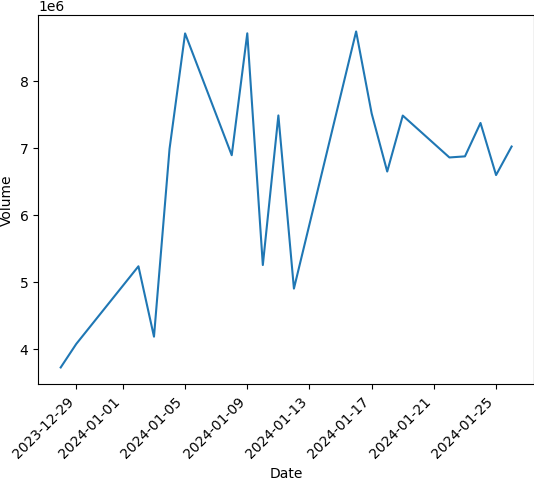
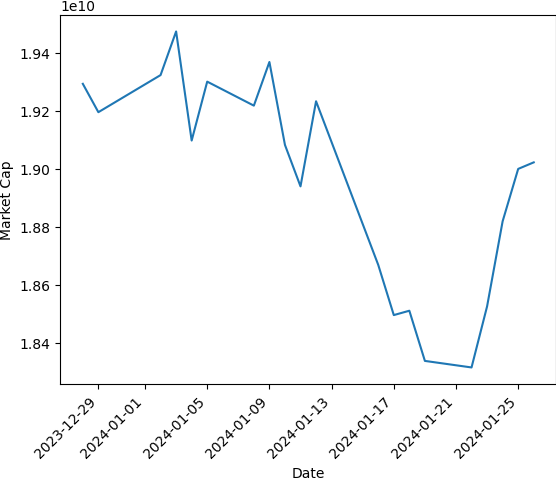
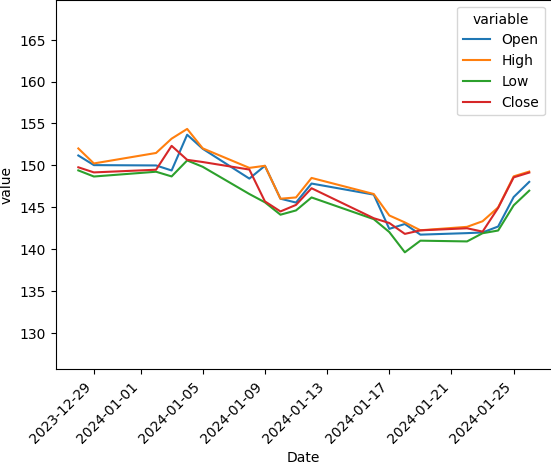
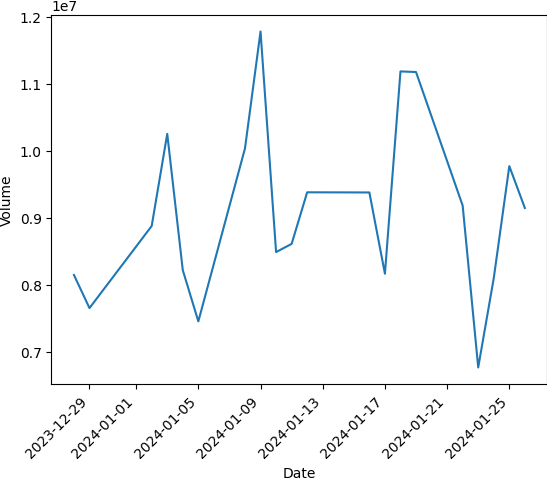
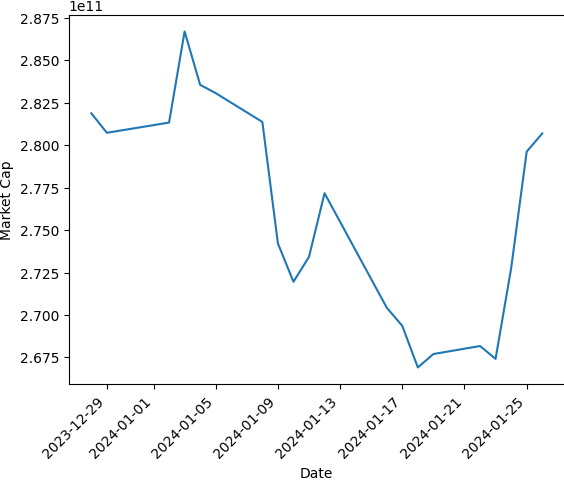
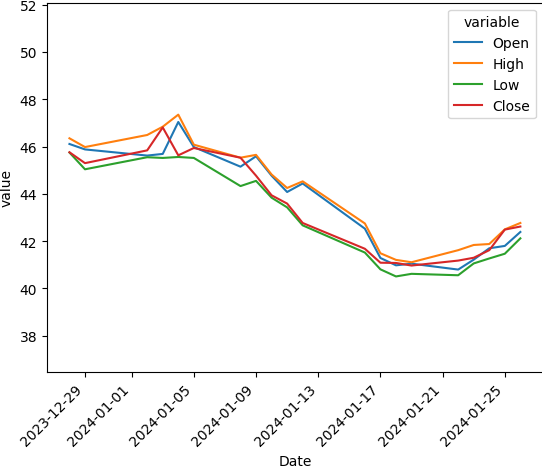
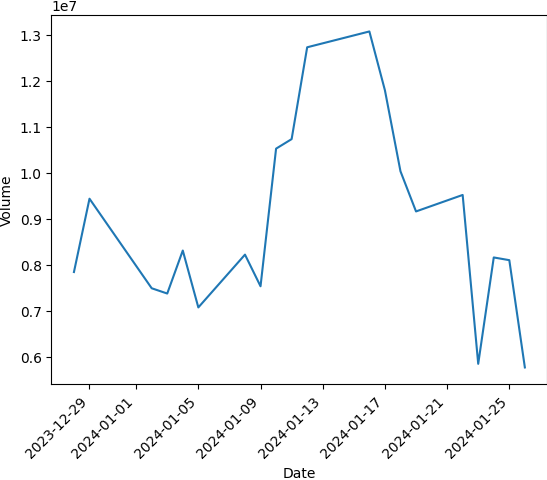
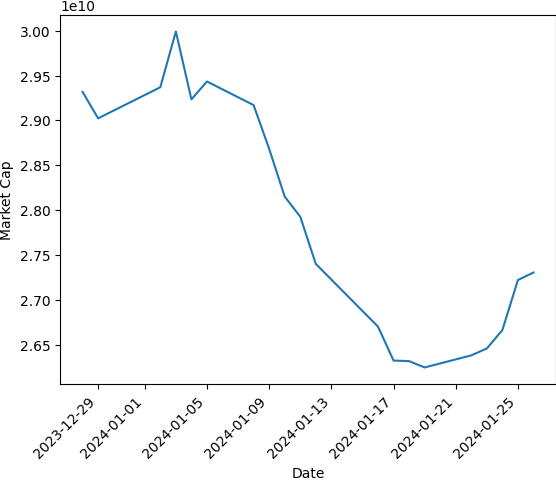
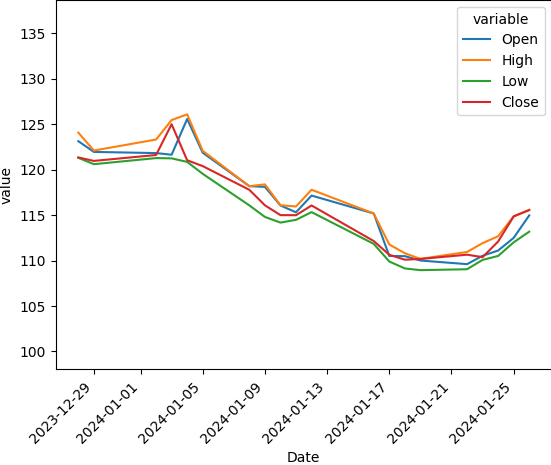
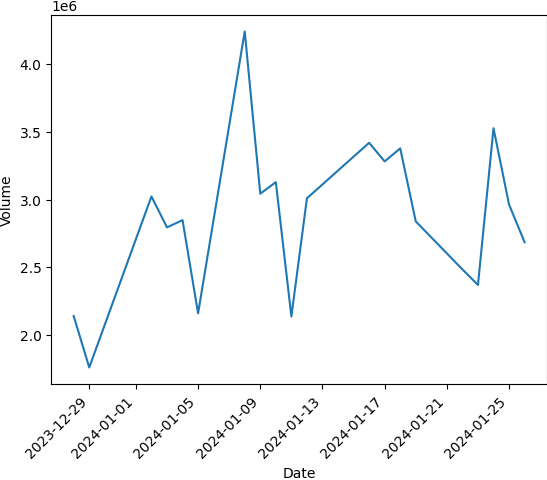
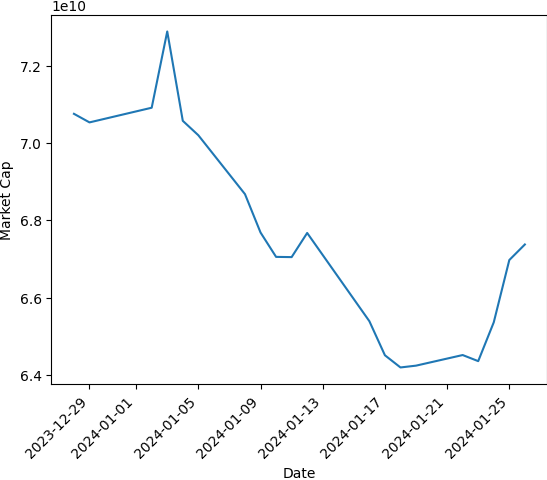
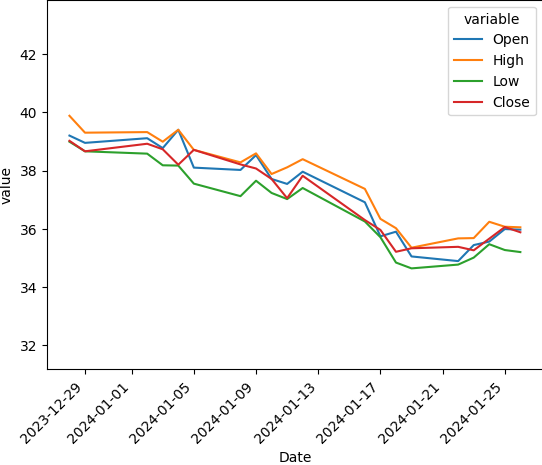
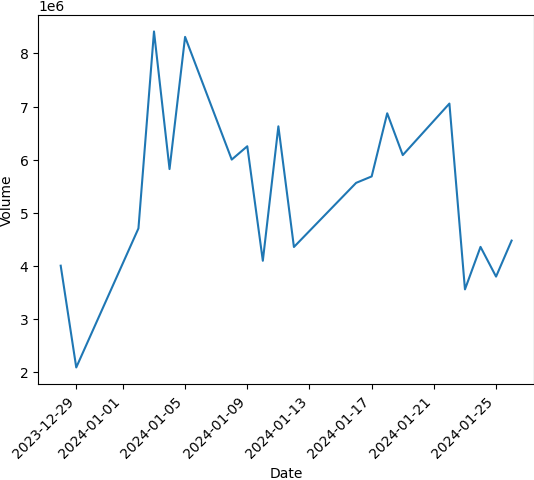
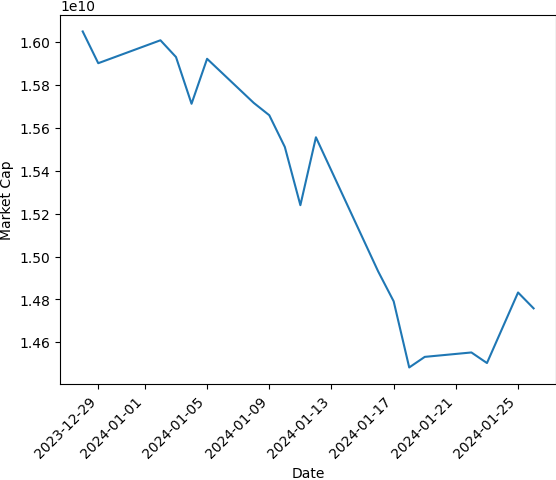
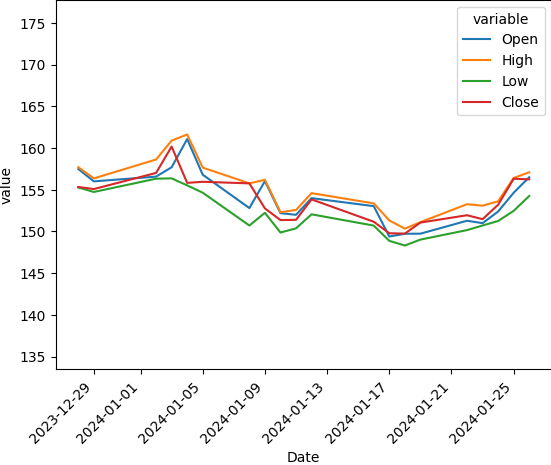
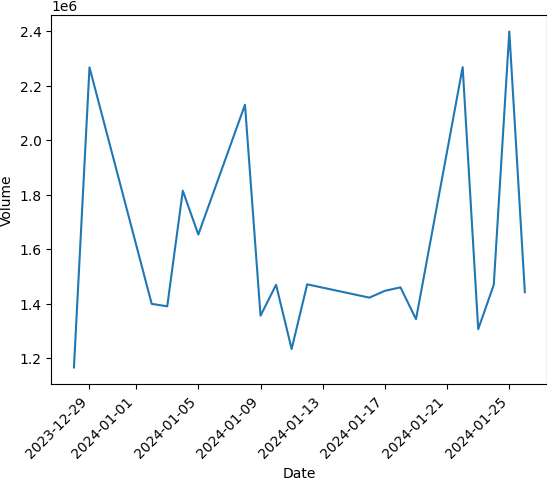
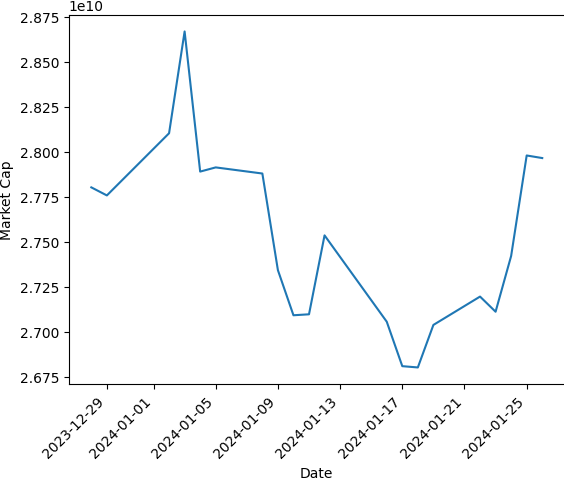
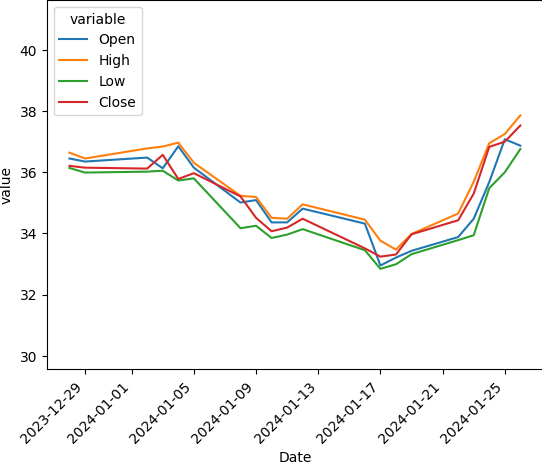
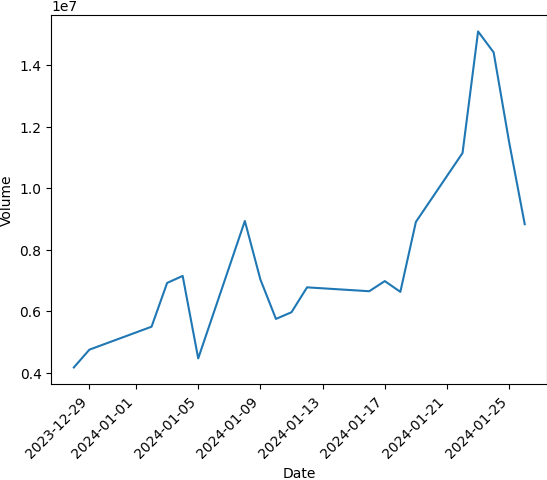
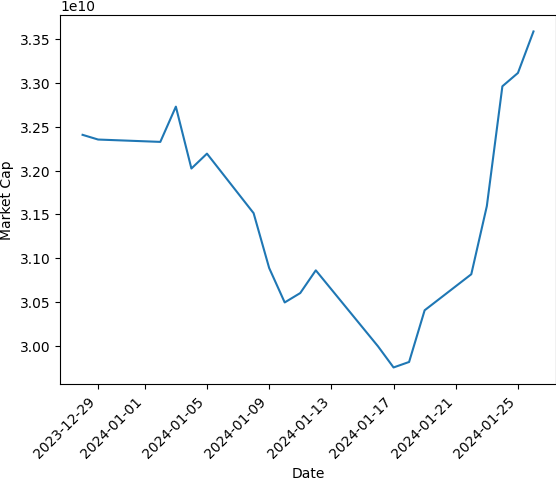
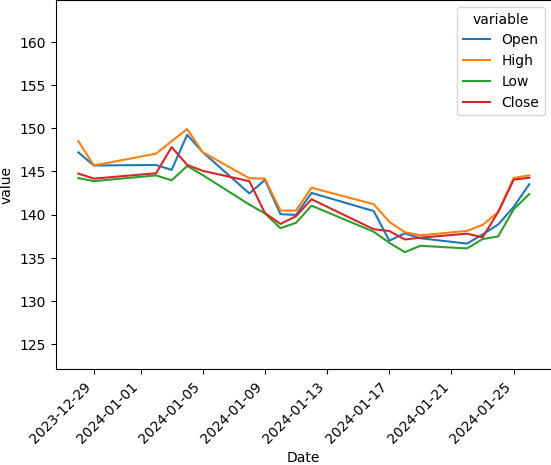
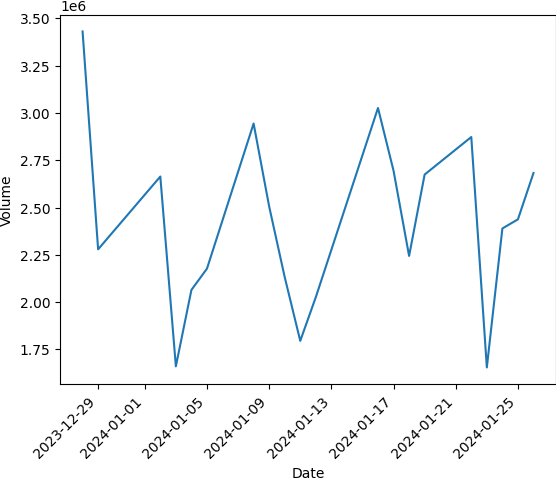
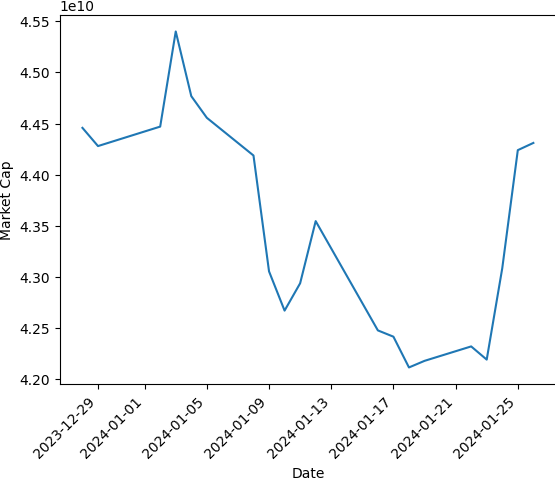
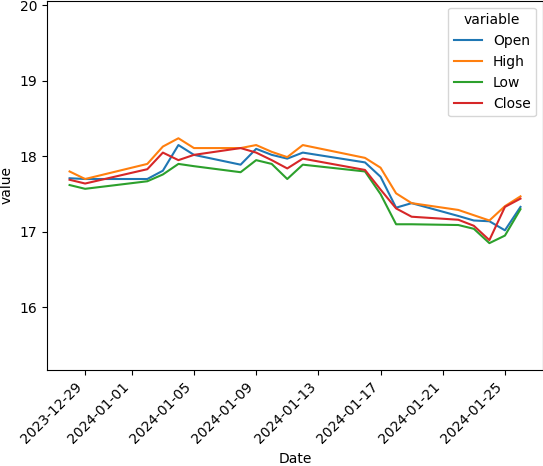
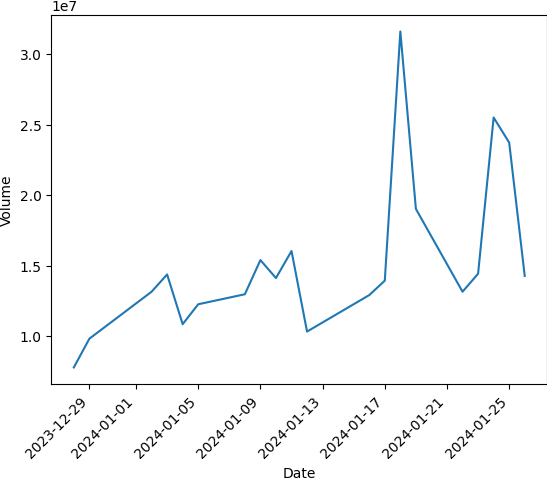
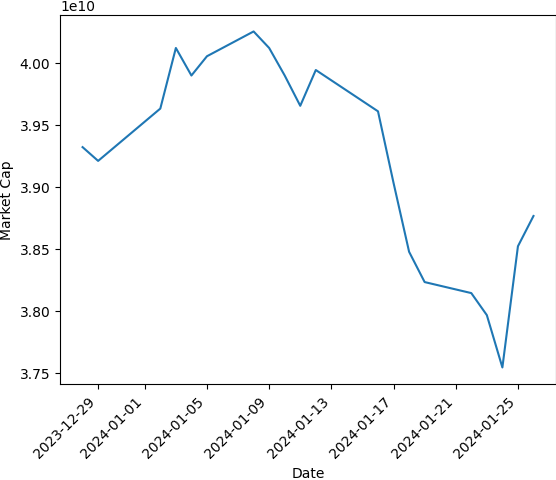
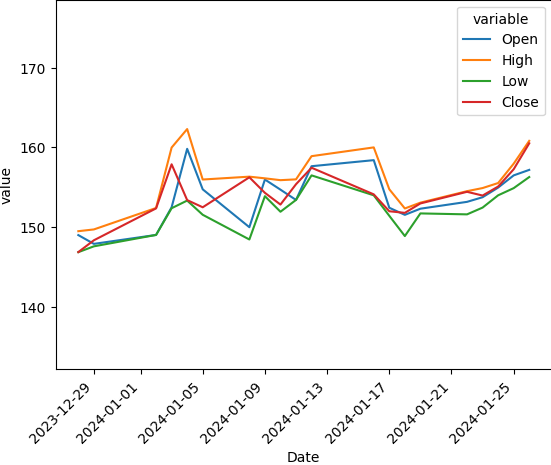
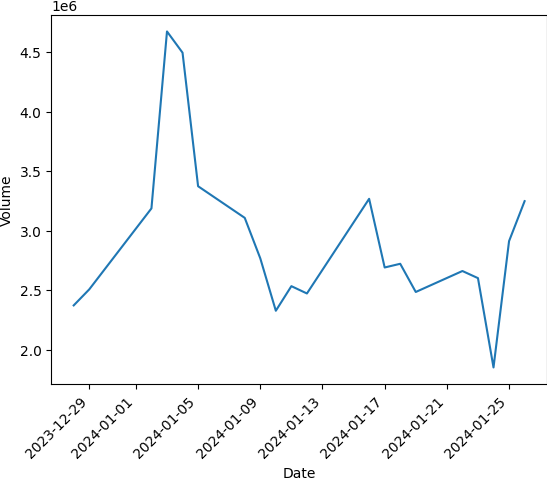
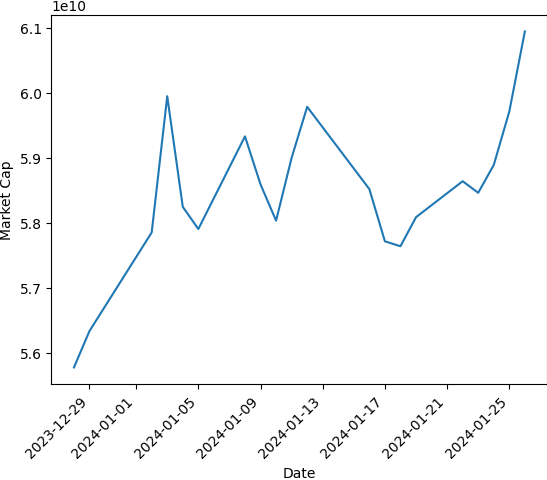
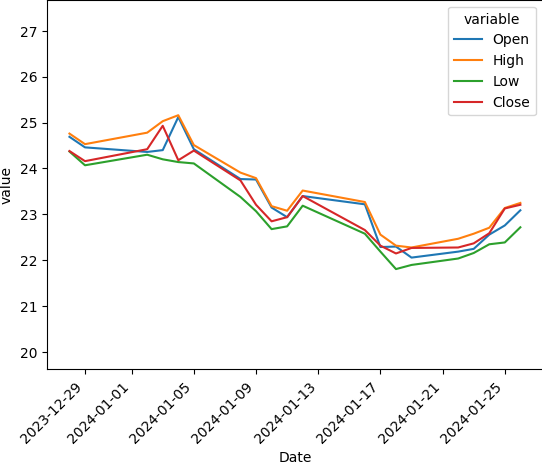
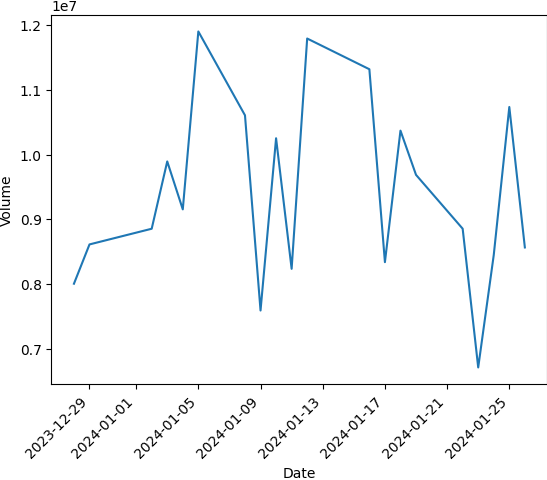
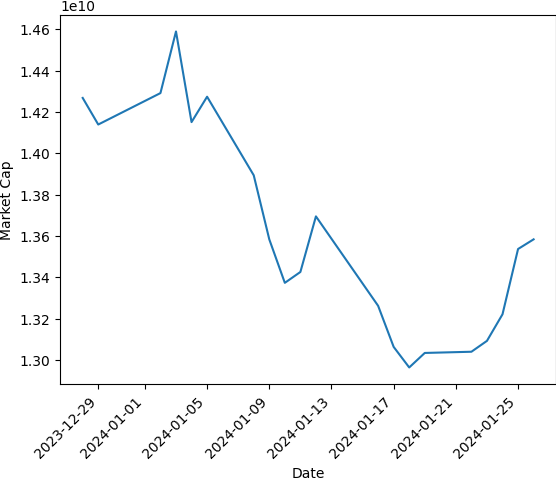
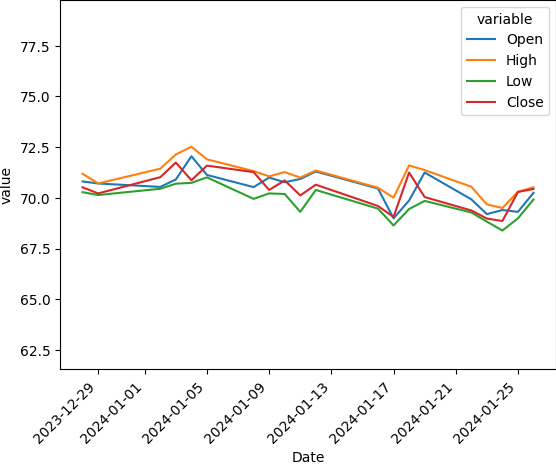
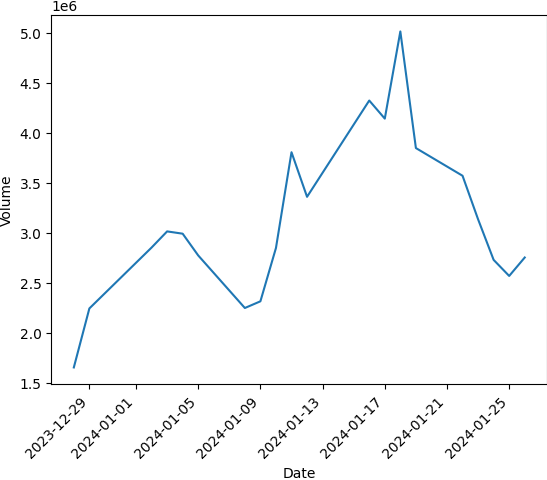
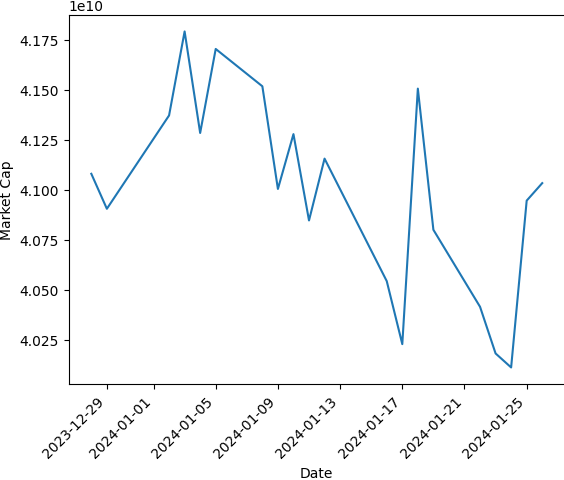
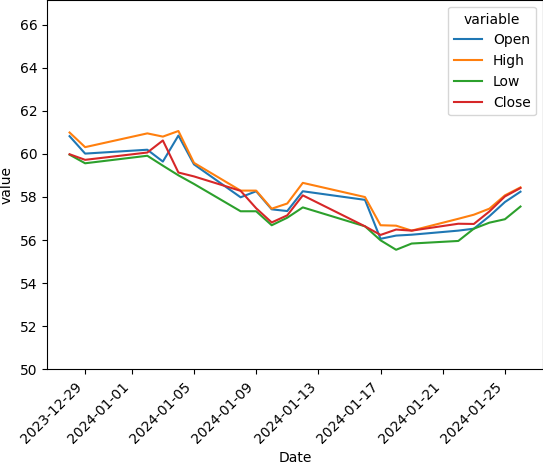
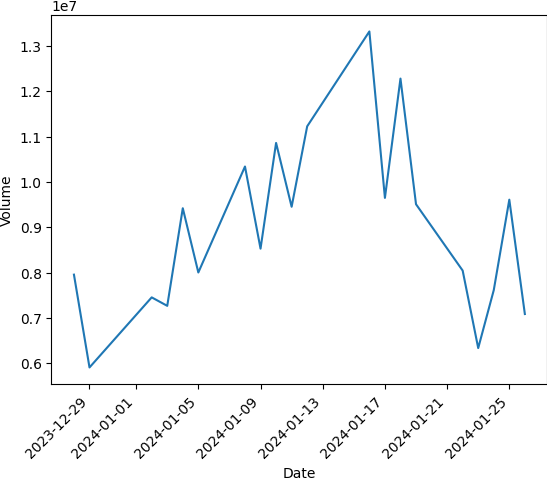
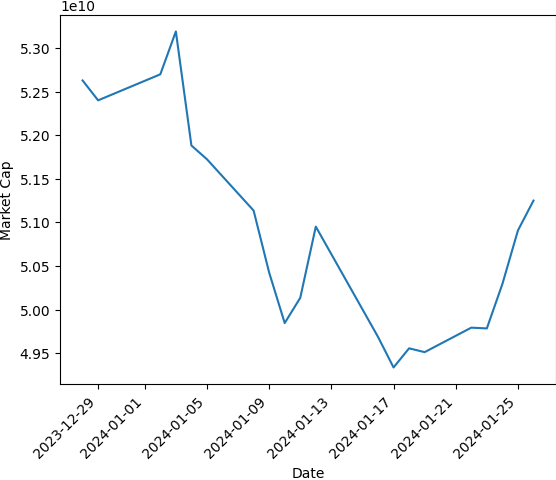
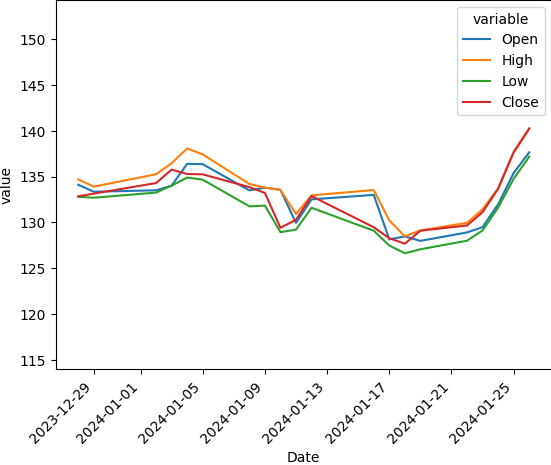
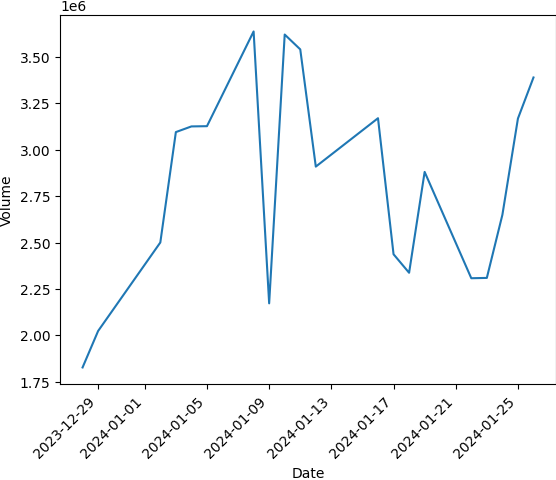
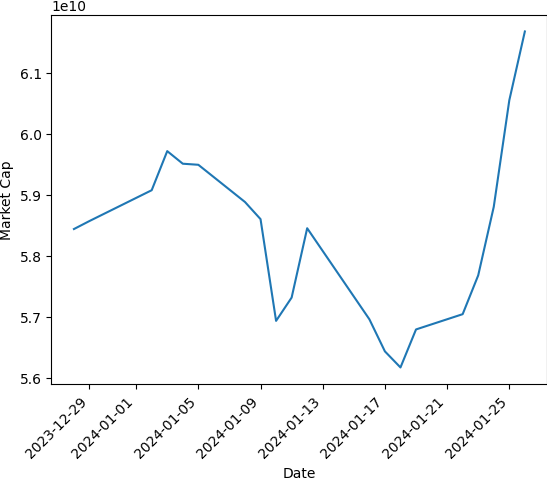
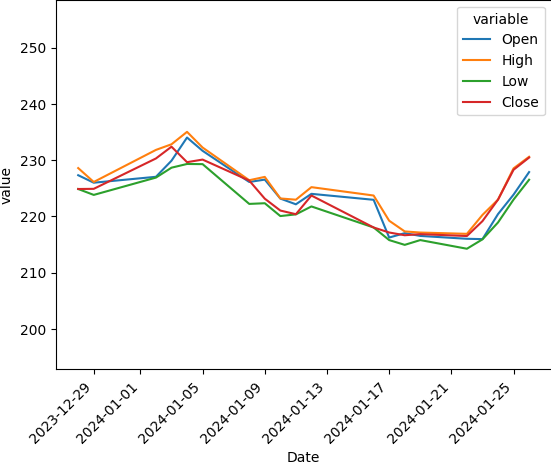
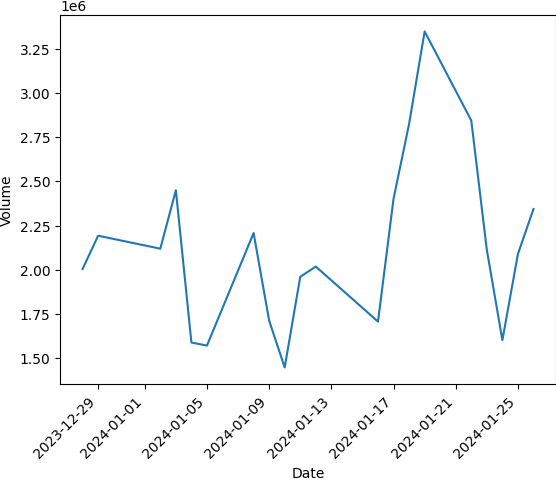
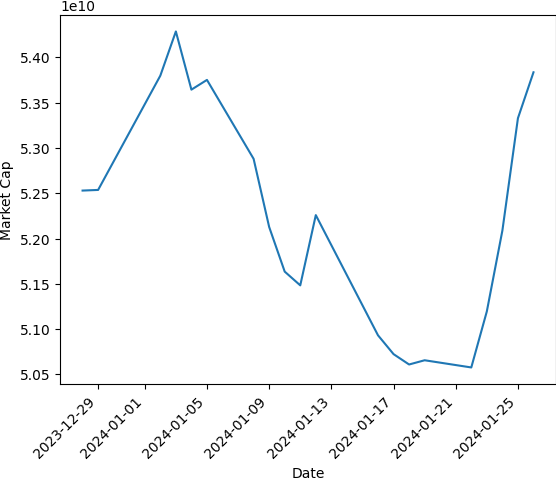
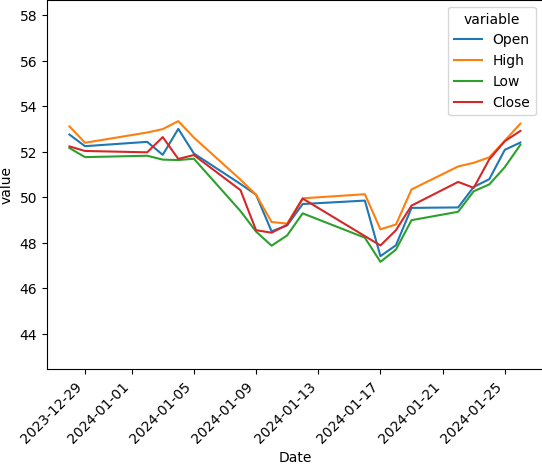
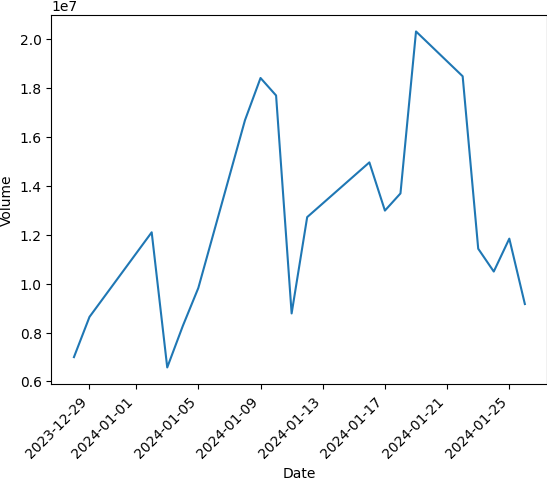
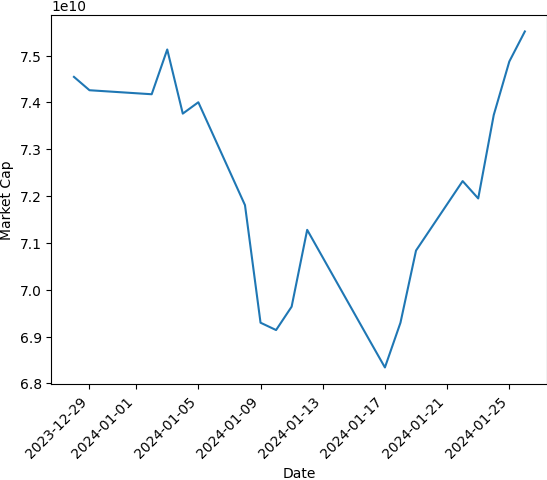
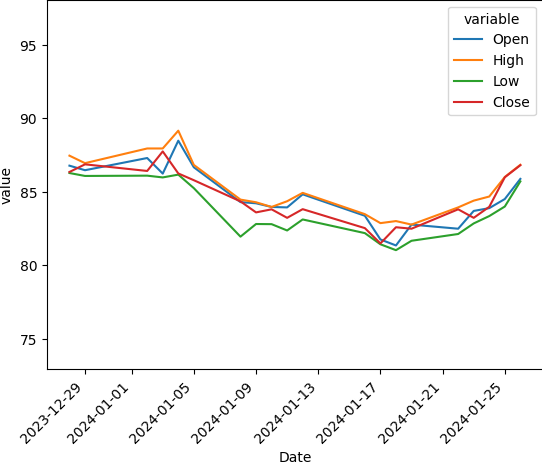
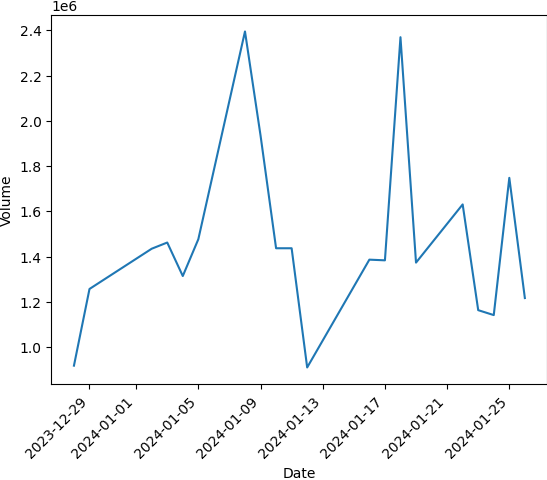
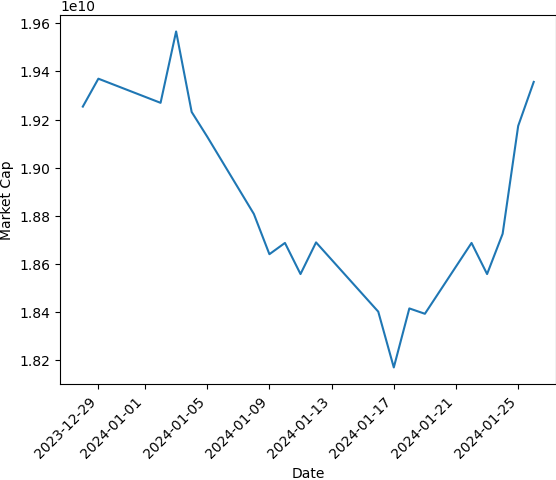
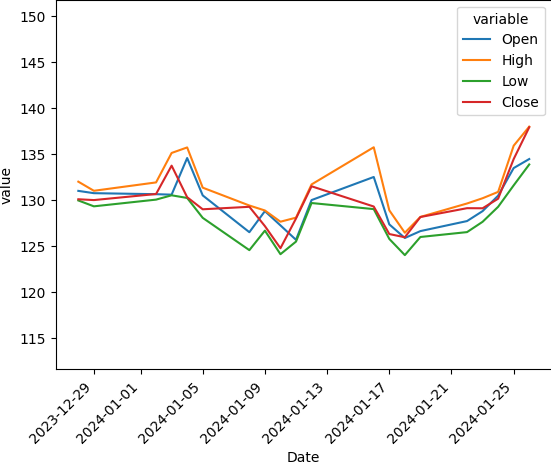
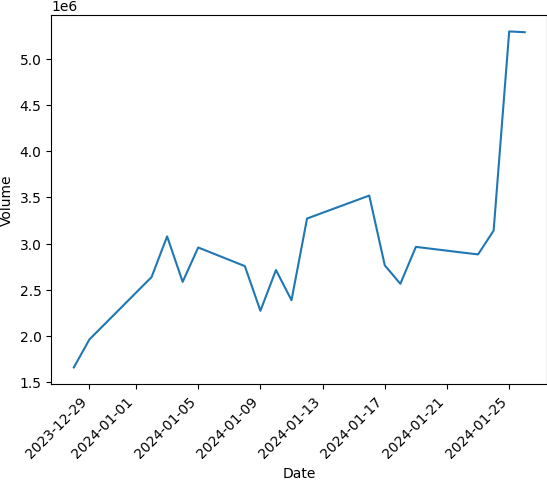
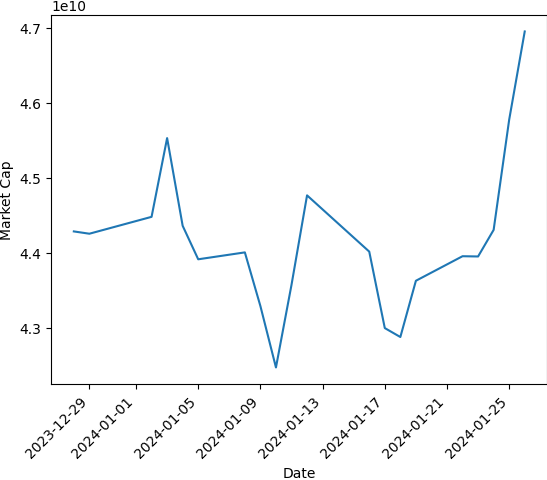
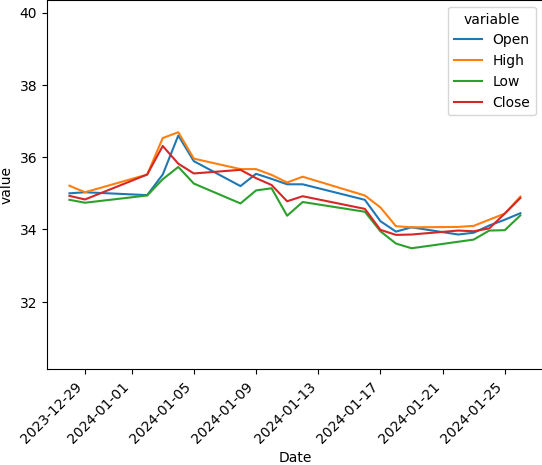
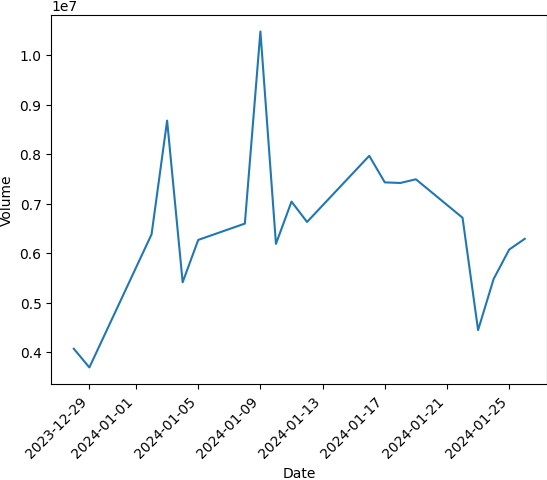
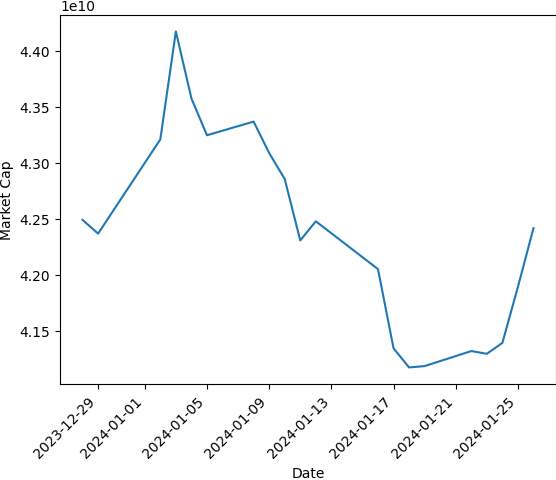
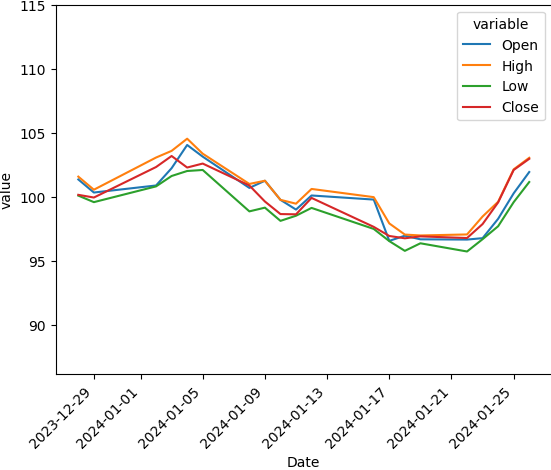
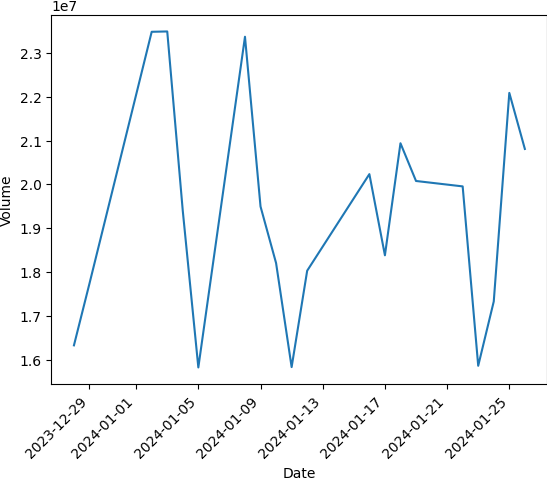
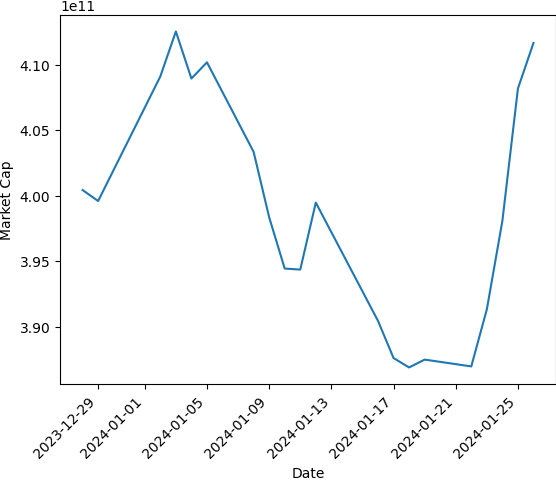

In [120]:
sun.render(
    prices
    .merge(volume, on='Symbol')
    .merge(mcap, on='Symbol')
    .set_index('Symbol')
)